In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

insurance_df = pd.read_csv('insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
print("Insurance Cost Data Shape:",insurance_df.shape)
print("\nInformation of Insurance Cost:\n")
insurance_df.info()
print("\nStatistical Analysis of Insurance Cost:\n")
insurance_df.describe()

Insurance Cost Data Shape: (1338, 7)

Information of Insurance Cost:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Statistical Analysis of Insurance Cost:



,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
insurance_df['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

### Dropping Null and Duplicates

In [6]:
print("NaN values present in Insurance Cost: ",insurance_df.isnull().values.sum())
print("Duplicates present in Insurance Cost: ",insurance_df.duplicated().sum())
insurance_df = insurance_df.drop_duplicates(keep='first')
print("Final Duplicates Count: ",insurance_df.duplicated().sum())

NaN values present in Insurance Cost:  0
Duplicates present in Insurance Cost:  1
Final Duplicates Count:  0


### Visualization of Numeric Columns

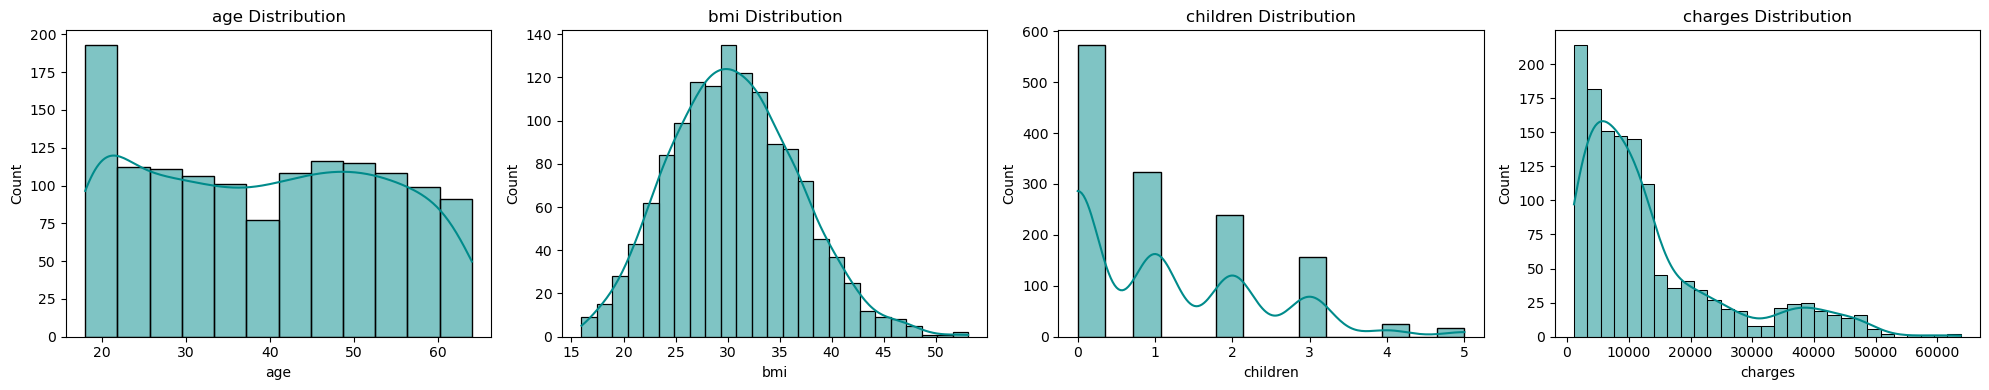

In [7]:
# Selecting all the numerical columns (int and float)
numeric_cols = insurance_df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(1, len(numeric_cols), figsize=(5 * len(numeric_cols), 4))
for j, col in enumerate(numeric_cols):
    sns.histplot(insurance_df[col], kde=True, ax=axes[j], color='darkcyan')
    axes[j].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

### Visualization of Object Columns

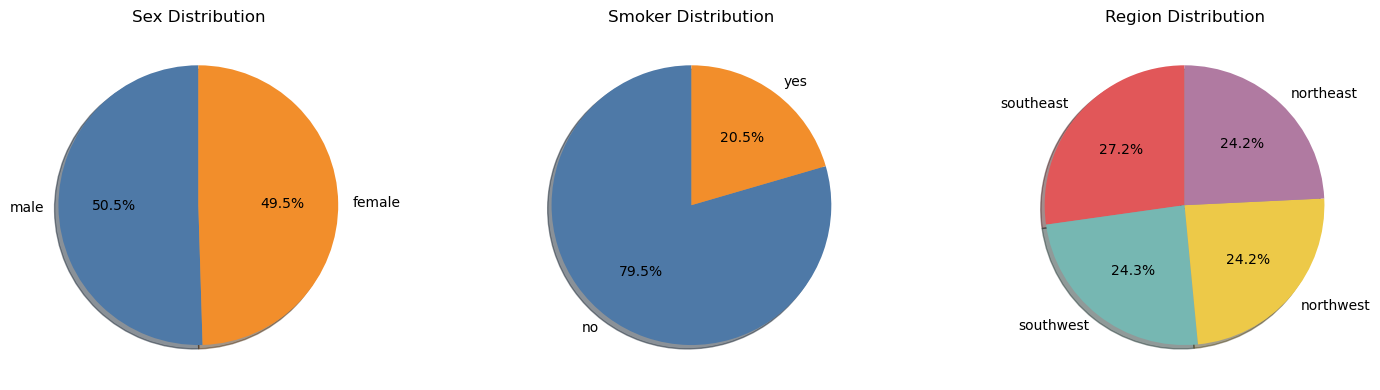

In [9]:
# Selecting all the object columns

object_columns = insurance_df.select_dtypes(include='object').columns

fig, axes = plt.subplots(1, len(object_columns), figsize=(5 * len(object_columns), 4))

# Handle the single column case
if len(object_columns) == 1:
    axes = [axes]

for j, col in enumerate(object_columns):
    # Default colors
    default_colors = ['#4e79a7', '#f28e2b', '#59a14f', '#af7aa1']
    
    # Custom colors for the third chart (index 2)
    if j == 2:
        custom_colors = ['#e15759', '#76b7b2', '#edc948', '#b07aa1']  # Example different palette
        color_set = custom_colors
    else:
        color_set = default_colors

    insurance_df[col].value_counts().plot.pie(
        ax=axes[j],
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        colors=color_set
    )
    axes[j].set_title(f'{col.capitalize()} Distribution')
    axes[j].set_ylabel('')  # Hide y-axis label

plt.tight_layout()
plt.show()


In [10]:
# Changing object to numeric
human_le = LabelEncoder()
insurance_df['sex']= human_le.fit_transform(insurance_df['sex'])
insurance_df['smoker']= human_le.fit_transform(insurance_df['smoker'])
insurance_df['region']= human_le.fit_transform(insurance_df['region'])
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int32  
 5   region    1337 non-null   int32  
 6   charges   1337 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 67.9 KB


Splitting

In [11]:
insuranceX = insurance_df.drop('charges',axis=1)
insuranceY = insurance_df['charges']

ins_Xtr, ins_Xts, ins_Ytr, ins_Yts = train_test_split(insuranceX, insuranceY, test_size=0.4, random_state=20)
ins_Xva, ins_Xts, ins_Yva, ins_Yts = train_test_split(ins_Xts, ins_Yts, test_size=0.5, random_state=20)

In [12]:
ins_Xtr

,age,sex,bmi,children,smoker,region
683,53,1,24.320,0,0,1
519,31,1,30.875,0,0,0
1245,28,1,24.300,5,0,3
769,38,0,19.475,2,0,1
218,26,0,29.920,1,0,2
...,...,...,...,...,...,...
1243,28,0,33.110,0,0,2
925,50,1,32.110,2,0,0
1248,18,0,39.820,0,0,2
271,50,1,34.200,2,1,3


In [13]:
ins_Xts

,age,sex,bmi,children,smoker,region
1,18,1,33.770,1,0,2
1013,48,1,32.300,1,0,1
1207,36,1,33.400,2,1,3
773,19,0,28.880,0,1,1
1057,45,0,31.790,0,0,2
...,...,...,...,...,...,...
605,51,0,34.100,0,0,2
1318,35,1,39.710,4,0,0
420,64,1,33.880,0,1,2
1186,20,1,35.625,3,1,1


In [14]:
ins_Xva

,age,sex,bmi,children,smoker,region
790,39,0,41.800,0,0,2
450,39,1,29.600,4,0,3
313,49,1,35.860,0,0,2
1118,33,1,35.750,1,1,2
813,28,1,22.515,2,0,0
...,...,...,...,...,...,...
244,63,0,27.740,0,1,0
530,57,1,42.130,1,1,2
165,47,1,28.215,4,0,0
1219,38,0,30.210,3,0,1


### Linear Regression

In [15]:
# train, validation and testing of Linear Regression

from sklearn.linear_model import LinearRegression

params_regressors = { 'fit_intercept':[True, False],
                      'n_jobs': [1, 3, 5, 8],
                      'copy_X': [True, False]
                    }

ins_model = LinearRegression()
ins_model = GridSearchCV(ins_model, params_regressors, cv=2)
ins_model.fit(ins_Xtr, ins_Ytr)
print("Chosen Parameters by Linear Regressor:\n")
print(ins_model.best_params_)

ins_model = ins_model.best_estimator_
ins_model.fit(ins_Xtr, ins_Ytr)

ins_Ypred = ins_model.predict(ins_Xva)
print("\n==Validation of Linear Regressor==\n")
print("R2 Score :", r2_score(ins_Yva, ins_Ypred)*100)
print("MAE      :", mean_absolute_error(ins_Yva, ins_Ypred))
print("MSE      :", mean_squared_error(ins_Yva, ins_Ypred))
print("RMSE     :", math.sqrt(mean_squared_error(ins_Yva, ins_Ypred)))

ins_Ypred = ins_model.predict(ins_Xts)
print("\n==Testing of Linear Regressor==\n")
print("R2 Score :", r2_score(ins_Yts, ins_Ypred)*100)
print("MAE      :", mean_absolute_error(ins_Yts, ins_Ypred))
print("MSE      :", mean_squared_error(ins_Yts, ins_Ypred))
print("RMSE     :", math.sqrt(mean_squared_error(ins_Yts, ins_Ypred)))

Chosen Parameters by Linear Regressor:

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1}

==Validation of Linear Regressor==

R2 Score : 78.3748286136425
MAE      : 4116.124943936906
MSE      : 32094635.29725244
RMSE     : 5665.2127318621

==Testing of Linear Regressor==

R2 Score : 71.91815041239579
MAE      : 4468.136033532687
MSE      : 38030589.470942184
RMSE     : 6166.894637574262


### Decision Tree Regression

In [ ]:
# train, validation and testing of Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor

params_regressors = { 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
                      'splitter': ['best', 'random'],
                      'max_depth': [1, 3, 5, 8]
                    }

ins_model = DecisionTreeRegressor()
ins_model = GridSearchCV(ins_model, params_regressors, cv=2)
ins_model.fit(ins_Xtr, ins_Ytr)
print("Chosen Parameters by DT Regressor:\n")
print(ins_model.best_params_)

ins_model = ins_model.best_estimator_
ins_model.fit(ins_Xtr, ins_Ytr)

ins_Ypred = ins_model.predict(ins_Xva)
print("\n==Validation of Decision Tree Regressor==\n")
print("R2 Score :", r2_score(ins_Yva, ins_Ypred)*100)
print("MAE      :", mean_absolute_error(ins_Yva, ins_Ypred))
print("MSE      :", mean_squared_error(ins_Yva, ins_Ypred))
print("RMSE     :", math.sqrt(mean_squared_error(ins_Yva, ins_Ypred)))

ins_Ypred = ins_model.predict(ins_Xts)
print("\n==Testing of Decision Tree Regressor==\n")
print("R2 Score :", r2_score(ins_Yts, ins_Ypred)*100)
print("MAE      :", mean_absolute_error(ins_Yts, ins_Ypred))
print("MSE      :", mean_squared_error(ins_Yts, ins_Ypred))
print("RMSE     :", math.sqrt(mean_squared_error(ins_Yts, ins_Ypred)))

Chosen Parameters by DT Regressor:

{'criterion': 'poisson', 'max_depth': 3, 'splitter': 'best'}

==Validation of Decision Tree Regressor==

R2 Score : 87.01802836112176
MAE      : 2731.324109054066
MSE      : 19266975.403113846
RMSE     : 4389.416294123154

==Testing of Decision Tree Regressor==

R2 Score : 81.26528880817904
MAE      : 3091.250883652701
MSE      : 25371979.4335525
RMSE     : 5037.060594588127
